<a href="https://colab.research.google.com/github/43pratik/ML_lab/blob/main/Prac_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

df = pd.read_csv('/content/cancer issue.csv')
print(df)

       PatientID  Age  Gender    Race/Ethnicity   BMI  SmokingStatus  \
0              1   80  Female             Other  23.3         Smoker   
1              2   76    Male         Caucasian  22.4  Former Smoker   
2              3   69    Male             Asian  21.5         Smoker   
3              4   77    Male             Asian  30.4  Former Smoker   
4              5   89    Male         Caucasian  20.9         Smoker   
...          ...  ...     ...               ...   ...            ...   
17681      17682   48    Male         Caucasian  35.3     Non-Smoker   
17682      17683   83  Female             Other  32.5         Smoker   
17683      17684   86    Male         Caucasian  39.8  Former Smoker   
17684      17685   77  Female  African American  37.9  Former Smoker   
17685      17686   80  Female  African American  29.3     Non-Smoker   

      FamilyHistory CancerType Stage  TumorSize        TreatmentType  \
0               Yes     Breast    II        1.7  Combination Th

In [ ]:
df.drop(columns=['PatientID'], inplace=True)

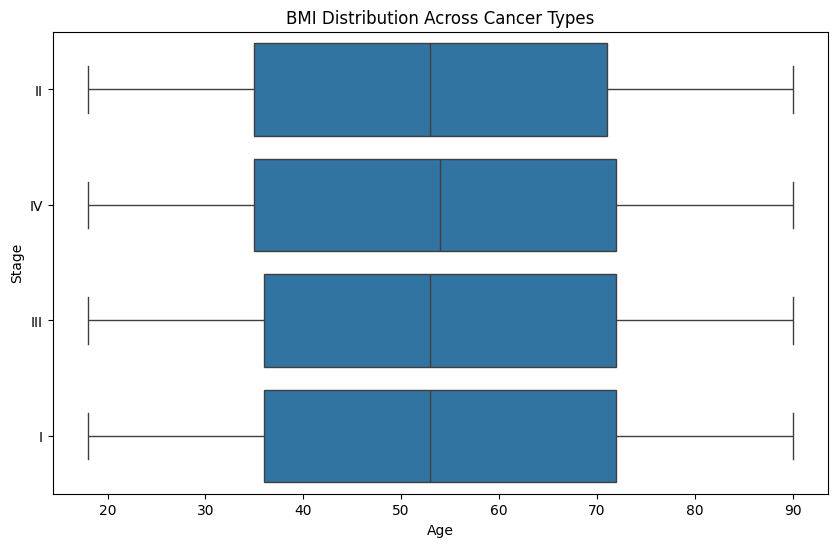

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Stage', data=df)
plt.title('BMI Distribution Across Cancer Types')
plt.xlabel('Age')
plt.ylabel('Stage')
plt.show()

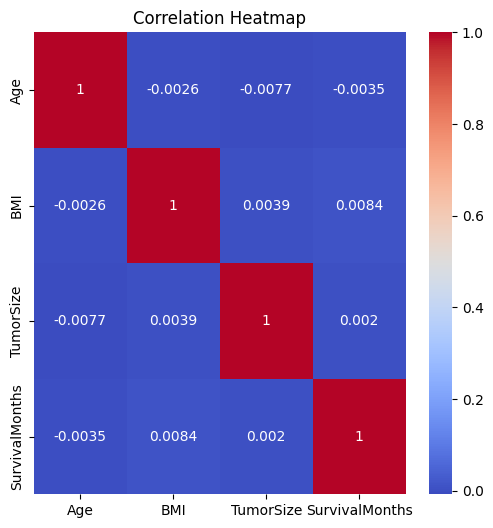

In [ ]:
plt.figure(figsize=(6, 6))
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

X = df.drop(columns=['Age'])
y = df['Stage']
# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object', 'string']).columns

# Convert categorical columns using LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column])

# Encode the target variable 'Stage'
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")# model performs in terms of prediction error
print(f"Test Mean Absolute Error: {mae:.4f}")#how far off the model's predictions are on average

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4105 - mae: 0.3699 - val_loss: 0.0126 - val_mae: 0.0903
Epoch 2/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0101 - mae: 0.0798 - val_loss: 0.0061 - val_mae: 0.0627
Epoch 3/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0050 - mae: 0.0563 - val_loss: 0.0040 - val_mae: 0.0504
Epoch 4/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0034 - mae: 0.0464 - val_loss: 0.0032 - val_mae: 0.0452
Epoch 5/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0024 - mae: 0.0391 - val_loss: 0.0023 - val_mae: 0.0379
Epoch 6/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0017 - mae: 0.0326 - val_loss: 0.0018 - val_mae: 0.0332
Epoch 7/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0013 - mae: 0.0285 - val_loss: 0.0013 - val_mae: 0.0283
Epoch 8/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0011 - mae: 0.0270 - val_loss: 0.0018 - val_mae: 0.0348
Epoch 9/20
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0011 

In [ ]:
# This code is of Bonus assignment
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = iris.target
data['species'] = data['species'].replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display the first few rows of the dataset
print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


<ipython-input-20-455d81f88afa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='sepal length (cm)', data=data, palette='Set2')


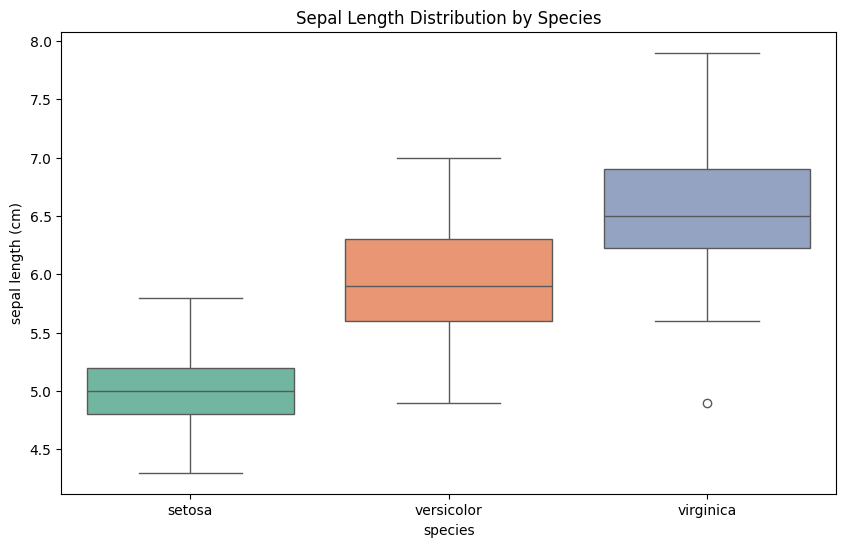

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='sepal length (cm)', data=data, palette='Set2')
plt.title('Sepal Length Distribution by Species')
plt.show()